In [1]:
import re
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [2]:
players = pd.read_csv("clean_player_data.csv")
returns = pd.read_csv("clean_return_stats.csv")
service = pd.read_csv("clean_service_stats.csv")

In [3]:
df = pd.concat([players, returns, service], axis = 1)

In [4]:
df = df.drop(columns = ['Unnamed: 0'])

In [5]:
df.head()

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,...,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,Travaglia,60,29,2008,176,"6'1""",29%,47%,348,42%,...,432,204,54%,74%,49%,377,58%,705,78%,63%
1,Koepfer,70,26,2016,175,"5'11""",31%,50%,201,39%,...,116,85,62%,68%,47%,241,62%,341,73%,60%
2,Chardy,61,33,2005,165,"6'2""",27%,49%,"3,615",37%,...,"4,601","2,364",60%,74%,49%,"3,657",63%,"7,055",81%,64%
3,Thiem,3,27,2011,174,"6'1""",30%,50%,"3,381",39%,...,"2,622","1,244",60%,74%,53%,"2,578",63%,"5,605",83%,66%
4,Krajinovic,33,28,2008,165,"6'1""",29%,51%,"1,081",41%,...,702,288,64%,68%,50%,"1,121",60%,"1,814",75%,62%


In [6]:
df.to_csv("atp_100_stats.csv")

In [7]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)

In [8]:
df.head()

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,Travaglia,60,29,2008,176,"6'1""",29%,47%,348,42%,699,21%,35%,49%,432,204,54%,74%,49%,377,58%,705,78%,63%
1,Koepfer,70,26,2016,175,"5'11""",31%,50%,201,39%,343,23%,38%,49%,116,85,62%,68%,47%,241,62%,341,73%,60%
2,Chardy,61,33,2005,165,"6'2""",27%,49%,"3,615",37%,"7,098",19%,35%,50%,"4,601","2,364",60%,74%,49%,"3,657",63%,"7,055",81%,64%
3,Thiem,3,27,2011,174,"6'1""",30%,50%,"3,381",39%,"5,617",24%,38%,51%,"2,622","1,244",60%,74%,53%,"2,578",63%,"5,605",83%,66%
4,Krajinovic,33,28,2008,165,"6'1""",29%,51%,"1,081",41%,"1,825",24%,38%,50%,702,288,64%,68%,50%,"1,121",60%,"1,814",75%,62%


In [9]:
df = df.drop(columns = ['Break Points Opportunities', 'Return Games Played', 'Aces', 'Double Faults', 'Break Points Faced',
                  'Service Games Played'])

In [10]:
df.head()

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Converted,Return Games Won,Return Points Won,Total Points Won,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Saved,Service Games Won,Total Service Points Won
0,Travaglia,60,29,2008,176,"6'1""",29%,47%,42%,21%,35%,49%,54%,74%,49%,58%,78%,63%
1,Koepfer,70,26,2016,175,"5'11""",31%,50%,39%,23%,38%,49%,62%,68%,47%,62%,73%,60%
2,Chardy,61,33,2005,165,"6'2""",27%,49%,37%,19%,35%,50%,60%,74%,49%,63%,81%,64%
3,Thiem,3,27,2011,174,"6'1""",30%,50%,39%,24%,38%,51%,60%,74%,53%,63%,83%,66%
4,Krajinovic,33,28,2008,165,"6'1""",29%,51%,41%,24%,38%,50%,64%,68%,50%,60%,75%,62%


In [11]:
df = df.sort_values(by='Ranking')

In [12]:
df = df.reset_index().drop(columns = 'index')

In [13]:
df

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Converted,Return Games Won,Return Points Won,Total Points Won,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Saved,Service Games Won,Total Service Points Won
0,Djokovic,1,33,2003,170,"6'2""",34%,55%,44%,32%,42%,54%,65%,74%,55%,65%,86%,67%
1,Nadal,2,34,2001,187,"6'1""",34%,55%,45%,34%,42%,55%,68%,72%,57%,67%,86%,67%
2,Thiem,3,27,2011,174,"6'1""",30%,50%,39%,24%,38%,51%,60%,74%,53%,63%,83%,66%
3,Medvedev,4,24,2014,182,"6'6""",30%,53%,40%,25%,39%,52%,60%,74%,52%,62%,82%,65%
4,Federer,5,39,1998,187,"6'1""",33%,51%,41%,27%,40%,54%,62%,77%,57%,67%,89%,70%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mager,96,26,2013,170,"6'2""",28%,49%,39%,19%,36%,50%,64%,70%,50%,69%,79%,63%
96,Kwon,97,23,2015,159,"5'11""",28%,50%,35%,20%,37%,49%,62%,69%,51%,61%,77%,62%
97,Novak,98,27,2011,176,"6'0""",26%,51%,42%,20%,35%,48%,64%,67%,49%,56%,74%,61%
98,Carballes Baena,99,27,2011,170,"6'0""",30%,51%,44%,24%,38%,50%,62%,67%,49%,59%,73%,60%


In [14]:
df['Ranking'] = df['Ranking'].apply(lambda x: 101-x) #standardize label

In [15]:
df = df.rename(columns = {'Ranking': 'Rating'})

In [16]:
df.head(3)

,Last Name,Rating,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Converted,Return Games Won,Return Points Won,Total Points Won,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Saved,Service Games Won,Total Service Points Won
0,Djokovic,100,33,2003,170,"6'2""",34%,55%,44%,32%,42%,54%,65%,74%,55%,65%,86%,67%
1,Nadal,99,34,2001,187,"6'1""",34%,55%,45%,34%,42%,55%,68%,72%,57%,67%,86%,67%
2,Thiem,98,27,2011,174,"6'1""",30%,50%,39%,24%,38%,51%,60%,74%,53%,63%,83%,66%


In [17]:
df = df.drop(columns = ['Last Name'])

In [18]:
df.head(3)

,Rating,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Converted,Return Games Won,Return Points Won,Total Points Won,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Saved,Service Games Won,Total Service Points Won
0,100,33,2003,170,"6'2""",34%,55%,44%,32%,42%,54%,65%,74%,55%,65%,86%,67%
1,99,34,2001,187,"6'1""",34%,55%,45%,34%,42%,55%,68%,72%,57%,67%,86%,67%
2,98,27,2011,174,"6'1""",30%,50%,39%,24%,38%,51%,60%,74%,53%,63%,83%,66%


In [19]:
def df_ft_to_inches(val):
    mid = val.split('\'')
    inches = int(mid[0])*12 + int(mid[1][0])
    return inches

In [20]:
df['Height'] =df['Height'].apply(lambda x: df_ft_to_inches(x))

In [21]:
df.head(3)

,Rating,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Converted,Return Games Won,Return Points Won,Total Points Won,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Saved,Service Games Won,Total Service Points Won
0,100,33,2003,170,74,34%,55%,44%,32%,42%,54%,65%,74%,55%,65%,86%,67%
1,99,34,2001,187,73,34%,55%,45%,34%,42%,55%,68%,72%,57%,67%,86%,67%
2,98,27,2011,174,73,30%,50%,39%,24%,38%,51%,60%,74%,53%,63%,83%,66%


In [22]:
df['Years Pro'] = df['Turned Pro'].apply(lambda x: 2021-x)

In [23]:
df.head()

,Rating,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Converted,Return Games Won,Return Points Won,Total Points Won,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Saved,Service Games Won,Total Service Points Won,Years Pro
0,100,33,2003,170,74,34%,55%,44%,32%,42%,54%,65%,74%,55%,65%,86%,67%,18
1,99,34,2001,187,73,34%,55%,45%,34%,42%,55%,68%,72%,57%,67%,86%,67%,20
2,98,27,2011,174,73,30%,50%,39%,24%,38%,51%,60%,74%,53%,63%,83%,66%,10
3,97,24,2014,182,78,30%,53%,40%,25%,39%,52%,60%,74%,52%,62%,82%,65%,7
4,96,39,1998,187,73,33%,51%,41%,27%,40%,54%,62%,77%,57%,67%,89%,70%,23


In [24]:
df['Age Turned Pro'] = df['Age']-df['Years Pro']

In [25]:
df = df.drop(columns = ['Age', 'Turned Pro', 'Years Pro'])

In [26]:
df.head(3)

,Rating,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Converted,Return Games Won,Return Points Won,Total Points Won,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Saved,Service Games Won,Total Service Points Won,Age Turned Pro
0,100,170,74,34%,55%,44%,32%,42%,54%,65%,74%,55%,65%,86%,67%,15
1,99,187,73,34%,55%,45%,34%,42%,55%,68%,72%,57%,67%,86%,67%,14
2,98,174,73,30%,50%,39%,24%,38%,51%,60%,74%,53%,63%,83%,66%,17


In [27]:
df.iloc[:,3] = df.iloc[:,3].apply(lambda x: float(x.strip('%')) / 100.0)
df.iloc[:,4] = df.iloc[:,4].apply(lambda x: float(x.strip('%')) / 100.0)
df.iloc[:,5] = df.iloc[:,5].apply(lambda x: float(x.strip('%')) / 100.0)
df.iloc[:,6] = df.iloc[:,6].apply(lambda x: float(x.strip('%')) / 100.0)
df.iloc[:,7] = df.iloc[:,7].apply(lambda x: float(x.strip('%')) / 100.0)
df.iloc[:,8] = df.iloc[:,8].apply(lambda x: float(x.strip('%')) / 100.0)
df.iloc[:,9] = df.iloc[:,9].apply(lambda x: float(x.strip('%')) / 100.0)
df.iloc[:,10] = df.iloc[:,10].apply(lambda x: float(x.strip('%')) / 100.0)
df.iloc[:,11] = df.iloc[:,11].apply(lambda x: float(x.strip('%')) / 100.0)
df.iloc[:,12] = df.iloc[:,12].apply(lambda x: float(x.strip('%')) / 100.0)
df.iloc[:,13] = df.iloc[:,13].apply(lambda x: float(x.strip('%')) / 100.0)
df.iloc[:,14] = df.iloc[:,14].apply(lambda x: float(x.strip('%')) / 100.0)

In [28]:
X = df.iloc[:,1:16]

In [29]:
Y = df.iloc[:,0]

In [30]:
mn = MinMaxScaler()

In [31]:
X = mn.fit_transform(X)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2)

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
ranking_y_pred = lr.predict(X_test)

In [36]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, ranking_y_pred))

Mean squared error: 754.92


In [37]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, ranking_y_pred))

Coefficient of determination: 0.08


In [38]:
print(lr.coef_)

[  14.20355176    6.72188694 -118.09986888 -103.7434599   -77.88285025
  362.2435768    55.00254336  -74.62591      -8.22142355   -2.23645722
  -17.12113336   26.09907985 -120.66943898  269.60640222  -35.97171711]


In [39]:
df.iloc[:,1:16].head(3)

,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Converted,Return Games Won,Return Points Won,Total Points Won,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Saved,Service Games Won,Total Service Points Won,Age Turned Pro
0,170,74,0.34,0.55,0.44,0.32,0.42,0.54,0.65,0.74,0.55,0.65,0.86,0.67,15
1,187,73,0.34,0.55,0.45,0.34,0.42,0.55,0.68,0.72,0.57,0.67,0.86,0.67,14
2,174,73,0.30,0.50,0.39,0.24,0.38,0.51,0.60,0.74,0.53,0.63,0.83,0.66,17


<AxesSubplot:xlabel='Rating'>

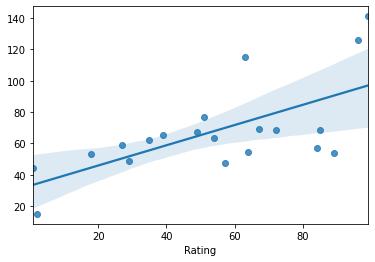

In [40]:
sns.regplot(x=y_test, y=ranking_y_pred)

In [41]:
df_feature_importance = pd.DataFrame(lr.coef_, index = df.iloc[:,1:16].columns, columns = ['feature importance']).sort_values('feature importance', ascending = False)

In [42]:
df_feature_importance

,feature importance
Return Games Won,362.243577
Total Service Points Won,269.606402
Return Points Won,55.002543
Break Points Saved,26.099080
Weight,14.203552
Height,6.721887
1st Serve Points Won,-2.236457
1st Serve,-8.221424
2nd Serve Points Won,-17.121133
Age Turned Pro,-35.971717


<AxesSubplot:>

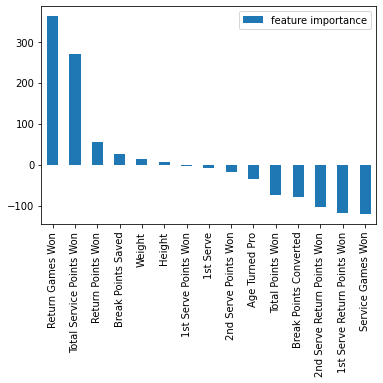

In [43]:
df_feature_importance.plot(kind='bar')

[Text(0, 0, 'Return Games Won'),
 Text(1, 0, 'Total Service Points Won'),
 Text(2, 0, 'Return Points Won'),
 Text(3, 0, 'Break Points Saved'),
 Text(4, 0, 'Weight'),
 Text(5, 0, 'Height'),
 Text(6, 0, '1st Serve Points Won'),
 Text(7, 0, '1st Serve'),
 Text(8, 0, '2nd Serve Points Won'),
 Text(9, 0, 'Age Turned Pro'),
 Text(10, 0, 'Total Points Won'),
 Text(11, 0, 'Break Points Converted'),
 Text(12, 0, '2nd Serve Return Points Won'),
 Text(13, 0, '1st Serve Return Points Won'),
 Text(14, 0, 'Service Games Won')]

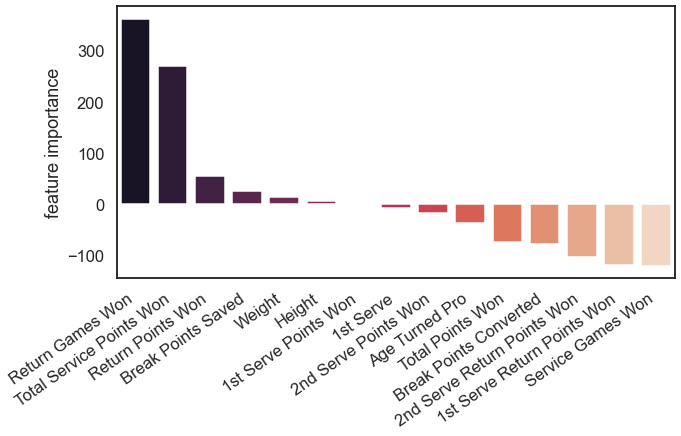

In [44]:
sns.set_theme(style="white", context="talk")
plt.figure(figsize=(10,5))
chart = sns.barplot(x=df_feature_importance.index, y=df_feature_importance['feature importance'], 
           palette = "rocket")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 35, horizontalalignment = 'right')

In [45]:
df.head()

,Rating,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Converted,Return Games Won,Return Points Won,Total Points Won,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Saved,Service Games Won,Total Service Points Won,Age Turned Pro
0,100,170,74,0.34,0.55,0.44,0.32,0.42,0.54,0.65,0.74,0.55,0.65,0.86,0.67,15
1,99,187,73,0.34,0.55,0.45,0.34,0.42,0.55,0.68,0.72,0.57,0.67,0.86,0.67,14
2,98,174,73,0.30,0.50,0.39,0.24,0.38,0.51,0.60,0.74,0.53,0.63,0.83,0.66,17
3,97,182,78,0.30,0.53,0.40,0.25,0.39,0.52,0.60,0.74,0.52,0.62,0.82,0.65,17
4,96,187,73,0.33,0.51,0.41,0.27,0.40,0.54,0.62,0.77,0.57,0.67,0.89,0.70,16


In [46]:
players = pd.read_csv("clean_player_data.csv")
returns = pd.read_csv("clean_return_stats.csv")
service = pd.read_csv("clean_service_stats.csv")

df = pd.concat([players, returns, service], axis = 1)
df = df.drop(columns = ['Unnamed: 0'])

In [47]:
df = df.sort_values(by = 'Ranking')

In [48]:
df = df.reset_index()

In [49]:
df = df.drop(columns = ['index'])

In [50]:
df.head()

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,Djokovic,1,33,2003,170,"6'2""",34%,55%,"9,509",44%,"13,169",32%,42%,54%,"5,882","2,486",65%,74%,55%,"5,574",65%,"13,544",86%,67%
1,Nadal,2,34,2001,187,"6'1""",34%,55%,"10,299",45%,"13,824",34%,42%,55%,"3,604","1,878",68%,72%,57%,"5,926",67%,"13,943",86%,67%
2,Thiem,3,27,2011,174,"6'1""",30%,50%,"3,381",39%,"5,617",24%,38%,51%,"2,622","1,244",60%,74%,53%,"2,578",63%,"5,605",83%,66%
3,Medvedev,4,24,2014,182,"6'6""",30%,53%,"1,850",40%,"2,964",25%,39%,52%,"1,914",836,60%,74%,52%,"1,408",62%,"2,953",82%,65%
4,Federer,5,39,1998,187,"6'1""",33%,51%,"11,822",41%,"18,229",27%,40%,54%,"11,344","2,742",62%,77%,57%,"6,367",67%,"18,630",89%,70%


In [51]:
pd.set_option('display.max_rows', 500)

In [52]:
df

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,Djokovic,1,33,2003,170,"6'2""",34%,55%,"9,509",44%,"13,169",32%,42%,54%,"5,882","2,486",65%,74%,55%,"5,574",65%,"13,544",86%,67%
1,Nadal,2,34,2001,187,"6'1""",34%,55%,"10,299",45%,"13,824",34%,42%,55%,"3,604","1,878",68%,72%,57%,"5,926",67%,"13,943",86%,67%
2,Thiem,3,27,2011,174,"6'1""",30%,50%,"3,381",39%,"5,617",24%,38%,51%,"2,622","1,244",60%,74%,53%,"2,578",63%,"5,605",83%,66%
3,Medvedev,4,24,2014,182,"6'6""",30%,53%,"1,850",40%,"2,964",25%,39%,52%,"1,914",836,60%,74%,52%,"1,408",62%,"2,953",82%,65%
4,Federer,5,39,1998,187,"6'1""",33%,51%,"11,822",41%,"18,229",27%,40%,54%,"11,344","2,742",62%,77%,57%,"6,367",67%,"18,630",89%,70%
5,Tsitsipas,6,22,2016,196,"6'4""",28%,48%,"1,356",38%,"2,647",20%,36%,52%,"1,466",478,62%,76%,54%,"1,083",64%,"2,700",86%,68%
6,Zverev,7,23,2013,198,"6'6""",30%,51%,"2,768",42%,"4,686",25%,38%,51%,"2,980","1,578",64%,74%,49%,"2,212",61%,"4,683",81%,65%
7,Rublev,8,23,2014,165,"6'2""",30%,53%,"1,623",40%,"2,600",25%,39%,51%,"1,270",672,60%,73%,50%,"1,366",61%,"2,580",80%,64%
8,Schwartzman,9,28,2010,141,"5'7""",33%,55%,"2,706",44%,"3,721",32%,42%,51%,682,865,62%,66%,50%,"2,338",56%,"3,675",72%,60%
9,Berrettini,10,24,2015,209,"6'5""",28%,47%,816,35%,"1,631",18%,35%,51%,"1,069",265,62%,78%,54%,656,66%,"1,628",86%,68%


In [53]:
df.sort_values(by = 'Return Games Won', ascending = False)

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
1,Nadal,2,34,2001,187,"6'1""",34%,55%,"10,299",45%,"13,824",34%,42%,55%,"3,604","1,878",68%,72%,57%,"5,926",67%,"13,943",86%,67%
0,Djokovic,1,33,2003,170,"6'2""",34%,55%,"9,509",44%,"13,169",32%,42%,54%,"5,882","2,486",65%,74%,55%,"5,574",65%,"13,544",86%,67%
8,Schwartzman,9,28,2010,141,"5'7""",33%,55%,"2,706",44%,"3,721",32%,42%,51%,682,865,62%,66%,50%,"2,338",56%,"3,675",72%,60%
14,Goffin,15,30,2009,154,"5'11""",31%,53%,"3,569",41%,"5,352",28%,40%,51%,"2,340","1,518",58%,71%,51%,"2,972",60%,"5,300",77%,63%
16,Fognini,17,33,2004,174,"5'10""",32%,51%,"5,005",43%,"7,934",27%,39%,50%,"2,123","2,549",59%,68%,48%,"5,150",57%,"7,880",72%,60%
41,Nishikori,42,31,2007,161,"5'10""",31%,53%,"4,690",41%,"7,079",27%,40%,52%,"1,936","1,534",61%,71%,53%,"3,598",61%,"7,038",80%,64%
4,Federer,5,39,1998,187,"6'1""",33%,51%,"11,822",41%,"18,229",27%,40%,54%,"11,344","2,742",62%,77%,57%,"6,367",67%,"18,630",89%,70%
53,Davidovich Fokina,54,21,2019,176,"6'0""",33%,51%,296,42%,466,27%,39%,49%,67,106,67%,63%,48%,343,56%,468,68%,58%
31,Sinner,32,19,2018,167,"6'2""",33%,51%,403,43%,650,27%,40%,51%,212,112,61%,71%,52%,371,64%,652,79%,63%
65,Simon,66,36,2002,154,"6'0""",31%,53%,"6,541",42%,"10,331",27%,40%,51%,"3,665","1,914",57%,70%,52%,"6,220",60%,"10,423",76%,62%


In [54]:
return_study = df[['Last Name', 'Ranking', 'Return Games Won']]

In [55]:
return_study.head(3)

,Last Name,Ranking,Return Games Won
0,Djokovic,1,32%
1,Nadal,2,34%
2,Thiem,3,24%


In [56]:
return_study['Return Games Won'] = return_study['Return Games Won'].apply(lambda x: x[0:2])

<ipython-input-56-b1033831d334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_study['Return Games Won'] = return_study['Return Games Won'].apply(lambda x: x[0:2])


In [57]:
return_study

,Last Name,Ranking,Return Games Won
0,Djokovic,1,32
1,Nadal,2,34
2,Thiem,3,24
3,Medvedev,4,25
4,Federer,5,27
5,Tsitsipas,6,20
6,Zverev,7,25
7,Rublev,8,25
8,Schwartzman,9,32
9,Berrettini,10,18


<Figure size 720x360 with 0 Axes>

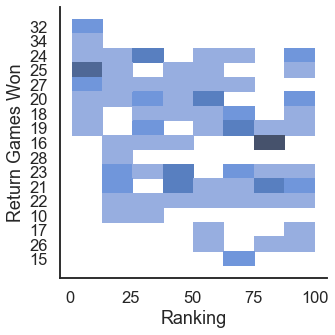

In [58]:
plt.figure(figsize=(10,5))
sns.displot(return_study, x = "Ranking", y = "Return Games Won")

<AxesSubplot:xlabel='Ranking', ylabel='Return Games Won'>

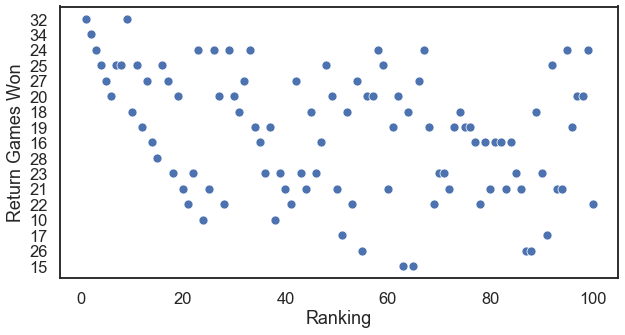

In [59]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = "Ranking", y = "Return Games Won", data = return_study)

<AxesSubplot:xlabel='Ranking', ylabel='Return Games Won'>

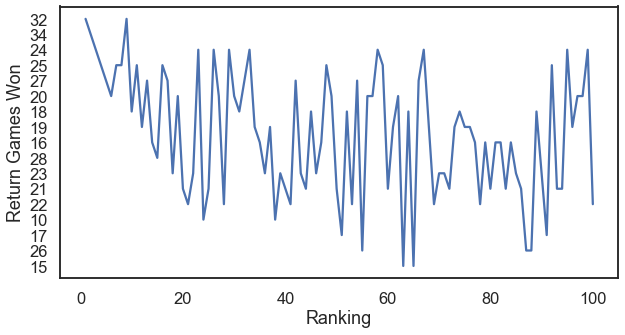

In [60]:
plt.figure(figsize=(10,5))
sns.lineplot(x = "Ranking", y = "Return Games Won", data = return_study)

<ipython-input-61-abccb0e10c59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_study['7 Rank SMA'] = return_study['Return Games Won'].rolling(7).mean()


<AxesSubplot:xlabel='Ranking', ylabel='7 Rank SMA'>

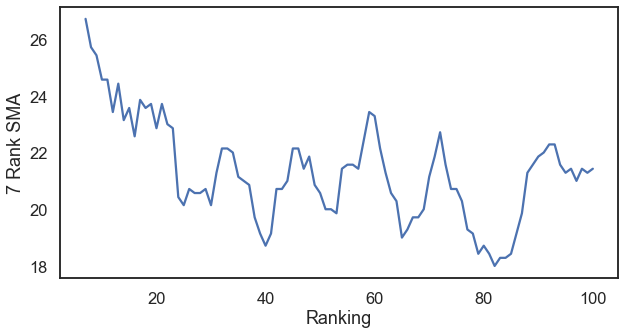

In [61]:
return_study['7 Rank SMA'] = return_study['Return Games Won'].rolling(7).mean()
plt.figure(figsize=(10,5))
sns.lineplot(x = "Ranking", y = "7 Rank SMA", data = return_study)

In [62]:
players2 = pd.read_csv("clean_player_data200.csv")
returns2 = pd.read_csv("clean_return_stats200.csv")
service2 = pd.read_csv("clean_service_stats200.csv")

In [63]:
df2 = pd.concat([players2, returns2, service2], axis = 1)
df2 = df2.drop(columns = "Unnamed: 0")

In [64]:
df2 = df2.sort_values(by="Ranking")

In [65]:
df2 = df2.reset_index()
df2 = df2.drop(columns = ["index"])

In [66]:
pd.set_option('display.max_rows', 500)

In [67]:
df2

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,Granollers,11,34,2003.0,176,"6'3""",35%,47%,74,38%,117,24%,39%,49%,17,13,59%,63%,50%,105,68%,117,71%,58%
1,Kohlschreiber,100,37,2001.0,154,"5'10""",14%,45%,22,36%,84,10%,27%,44%,14,13,67%,67%,44%,53,53%,84,70%,60%
2,Munar,101,23,2014.0,168,"6'0""",21%,40%,"2,688",30%,"9,533",9%,28%,50%,"13,653","2,434",66%,83%,53%,"2,632",71%,"9,560",92%,73%
3,Hanfmann,102,29,2015.0,190,"6'4""",29%,47%,221,35%,380,21%,36%,50%,137,67,63%,70%,50%,203,62%,380,79%,63%
4,Martin,103,31,2007.0,183,"6'0""",35%,49%,310,40%,436,28%,40%,50%,92,82,65%,64%,50%,351,64%,432,71%,59%
5,Sugita,104,32,2006.0,159,"5'9""",26%,49%,234,36%,460,18%,35%,48%,199,108,63%,67%,48%,285,55%,455,72%,60%
6,Duckworth,105,29,2010.0,181,"6'0""",21%,47%,47,34%,114,14%,32%,48%,50,14,64%,69%,51%,85,72%,114,79%,62%
7,Uchiyama,106,28,2011.0,172,"6'0""",25%,43%,255,32%,604,14%,32%,48%,390,197,61%,73%,50%,340,65%,600,80%,64%
8,Sousa,107,32,2007.0,154,"5'11""",28%,52%,53,43%,103,22%,38%,49%,48,17,63%,66%,49%,64,56%,101,72%,59%
9,Seppi,108,36,2002.0,172,"6'3""",25%,42%,265,35%,754,12%,31%,47%,435,249,61%,70%,50%,438,59%,754,76%,62%


In [68]:
df2.iloc[0,1] = 179

In [69]:
df2.iloc[81,3] = 2014.0

In [70]:
df2.head()

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,Granollers,179,34,2003.0,176,"6'3""",35%,47%,74,38%,117,24%,39%,49%,17,13,59%,63%,50%,105,68%,117,71%,58%
1,Kohlschreiber,100,37,2001.0,154,"5'10""",14%,45%,22,36%,84,10%,27%,44%,14,13,67%,67%,44%,53,53%,84,70%,60%
2,Munar,101,23,2014.0,168,"6'0""",21%,40%,"2,688",30%,"9,533",9%,28%,50%,"13,653","2,434",66%,83%,53%,"2,632",71%,"9,560",92%,73%
3,Hanfmann,102,29,2015.0,190,"6'4""",29%,47%,221,35%,380,21%,36%,50%,137,67,63%,70%,50%,203,62%,380,79%,63%
4,Martin,103,31,2007.0,183,"6'0""",35%,49%,310,40%,436,28%,40%,50%,92,82,65%,64%,50%,351,64%,432,71%,59%


In [71]:
df2 = df2.sort_values(by = 'Ranking')
df2 = df2.reset_index()

In [72]:
df2 = df2.dropna()

In [73]:
df2

,index,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,1,Kohlschreiber,100,37,2001.0,154,"5'10""",14%,45%,22,36%,84,10%,27%,44%,14,13,67%,67%,44%,53,53%,84,70%,60%
1,2,Munar,101,23,2014.0,168,"6'0""",21%,40%,"2,688",30%,"9,533",9%,28%,50%,"13,653","2,434",66%,83%,53%,"2,632",71%,"9,560",92%,73%
2,3,Hanfmann,102,29,2015.0,190,"6'4""",29%,47%,221,35%,380,21%,36%,50%,137,67,63%,70%,50%,203,62%,380,79%,63%
3,4,Martin,103,31,2007.0,183,"6'0""",35%,49%,310,40%,436,28%,40%,50%,92,82,65%,64%,50%,351,64%,432,71%,59%
4,5,Sugita,104,32,2006.0,159,"5'9""",26%,49%,234,36%,460,18%,35%,48%,199,108,63%,67%,48%,285,55%,455,72%,60%
5,6,Duckworth,105,29,2010.0,181,"6'0""",21%,47%,47,34%,114,14%,32%,48%,50,14,64%,69%,51%,85,72%,114,79%,62%
6,7,Uchiyama,106,28,2011.0,172,"6'0""",25%,43%,255,32%,604,14%,32%,48%,390,197,61%,73%,50%,340,65%,600,80%,64%
7,8,Sousa,107,32,2007.0,154,"5'11""",28%,52%,53,43%,103,22%,38%,49%,48,17,63%,66%,49%,64,56%,101,72%,59%
8,9,Seppi,108,36,2002.0,172,"6'3""",25%,42%,265,35%,754,12%,31%,47%,435,249,61%,70%,50%,438,59%,754,76%,62%
9,10,Majchrzak,109,25,2013.0,173,"5'11""",28%,47%,385,34%,783,17%,35%,48%,281,247,61%,67%,49%,522,58%,785,72%,60%


In [74]:
df2_study = df2[['Last Name', 'Ranking', 'Return Games Won']]

In [75]:
df2_study.head()

,Last Name,Ranking,Return Games Won
0,Kohlschreiber,100,10%
1,Munar,101,9%
2,Hanfmann,102,21%
3,Martin,103,28%
4,Sugita,104,18%


In [76]:
df2_study.iloc[0,2].split('%')[0]

'10'

In [77]:
df2_study['Return Games Won'] = df2_study['Return Games Won'].apply(lambda x: x.split('%')[0])

<ipython-input-77-fd5498581c52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_study['Return Games Won'] = df2_study['Return Games Won'].apply(lambda x: x.split('%')[0])


In [78]:
df2_study

,Last Name,Ranking,Return Games Won
0,Kohlschreiber,100,10
1,Munar,101,9
2,Hanfmann,102,21
3,Martin,103,28
4,Sugita,104,18
5,Duckworth,105,14
6,Uchiyama,106,14
7,Sousa,107,22
8,Seppi,108,12
9,Majchrzak,109,17


In [79]:
df2_study['Return Games Won'] = df2_study['Return Games Won'].apply(lambda x: int(x))

<ipython-input-79-76235f04cbd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_study['Return Games Won'] = df2_study['Return Games Won'].apply(lambda x: int(x))


<AxesSubplot:xlabel='Ranking', ylabel='Return Games Won'>

<Figure size 432x288 with 0 Axes>

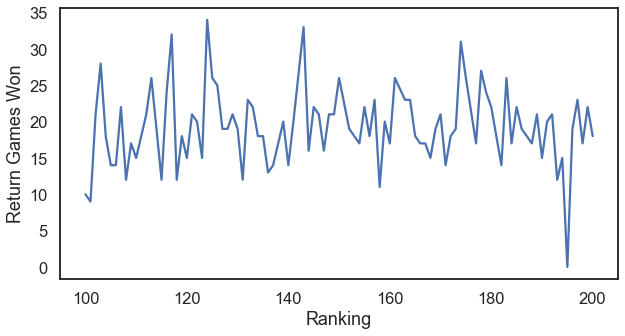

In [80]:
plt.clf()
plt.figure(figsize=(10,5))
sns.lineplot(x="Ranking", y="Return Games Won", data = df2_study)

<AxesSubplot:xlabel='Ranking', ylabel='Return Games Won'>

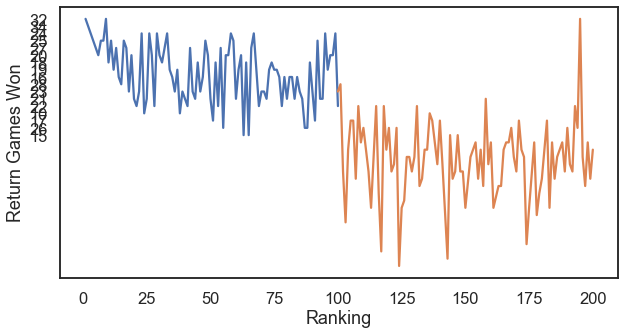

In [81]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Ranking", y="Return Games Won", data = return_study)
sns.lineplot(x="Ranking", y="Return Games Won", data = df2_study)

In [82]:
study_200 = pd.concat([return_study, df2_study])

In [84]:
study_200["Ranking"] = study_200.Ranking.apply(lambda x: int(x))

In [85]:
study_200["Return Games Won"] = study_200["Return Games Won"].apply(lambda x: int(x))

<AxesSubplot:xlabel='Ranking', ylabel='Return Games Won'>

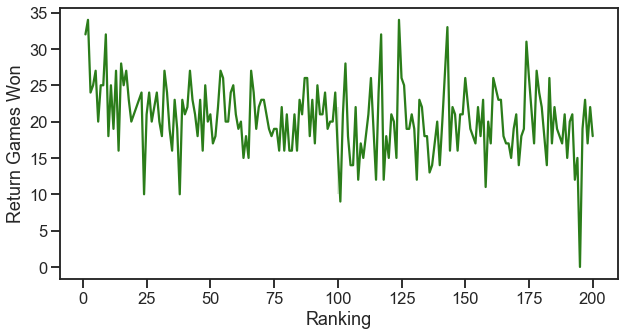

In [86]:
plt.figure(figsize=(10,5))
sns.set_style("ticks")
sns.lineplot(x="Ranking", y="Return Games Won", data=study_200, color = '#2b7d1a')

In [87]:
study_200["30 Rank SMA"] = study_200["Return Games Won"].rolling(30).mean()

<AxesSubplot:xlabel='Ranking', ylabel='30 Rank SMA'>

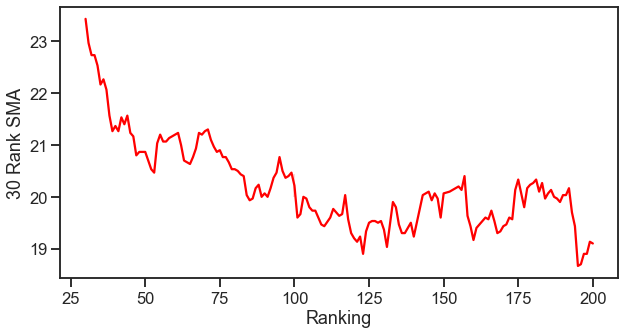

In [88]:
plt.figure(figsize = (10,5))
sns.set_style("ticks")
sns.lineplot(x = "Ranking", y = "30 Rank SMA", data = study_200, color = 'red')

In [89]:
df2 = df2.drop(columns = ['index'])

In [90]:
df2.head()

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,Kohlschreiber,100,37,2001.0,154,"5'10""",14%,45%,22,36%,84,10%,27%,44%,14,13,67%,67%,44%,53,53%,84,70%,60%
1,Munar,101,23,2014.0,168,"6'0""",21%,40%,"2,688",30%,"9,533",9%,28%,50%,"13,653","2,434",66%,83%,53%,"2,632",71%,"9,560",92%,73%
2,Hanfmann,102,29,2015.0,190,"6'4""",29%,47%,221,35%,380,21%,36%,50%,137,67,63%,70%,50%,203,62%,380,79%,63%
3,Martin,103,31,2007.0,183,"6'0""",35%,49%,310,40%,436,28%,40%,50%,92,82,65%,64%,50%,351,64%,432,71%,59%
4,Sugita,104,32,2006.0,159,"5'9""",26%,49%,234,36%,460,18%,35%,48%,199,108,63%,67%,48%,285,55%,455,72%,60%


In [91]:
df.head()

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,Djokovic,1,33,2003,170,"6'2""",34%,55%,"9,509",44%,"13,169",32%,42%,54%,"5,882","2,486",65%,74%,55%,"5,574",65%,"13,544",86%,67%
1,Nadal,2,34,2001,187,"6'1""",34%,55%,"10,299",45%,"13,824",34%,42%,55%,"3,604","1,878",68%,72%,57%,"5,926",67%,"13,943",86%,67%
2,Thiem,3,27,2011,174,"6'1""",30%,50%,"3,381",39%,"5,617",24%,38%,51%,"2,622","1,244",60%,74%,53%,"2,578",63%,"5,605",83%,66%
3,Medvedev,4,24,2014,182,"6'6""",30%,53%,"1,850",40%,"2,964",25%,39%,52%,"1,914",836,60%,74%,52%,"1,408",62%,"2,953",82%,65%
4,Federer,5,39,1998,187,"6'1""",33%,51%,"11,822",41%,"18,229",27%,40%,54%,"11,344","2,742",62%,77%,57%,"6,367",67%,"18,630",89%,70%


In [92]:
df['Height'] =df['Height'].apply(lambda x: df_ft_to_inches(x))

In [93]:
df.head()

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,Djokovic,1,33,2003,170,74,34%,55%,"9,509",44%,"13,169",32%,42%,54%,"5,882","2,486",65%,74%,55%,"5,574",65%,"13,544",86%,67%
1,Nadal,2,34,2001,187,73,34%,55%,"10,299",45%,"13,824",34%,42%,55%,"3,604","1,878",68%,72%,57%,"5,926",67%,"13,943",86%,67%
2,Thiem,3,27,2011,174,73,30%,50%,"3,381",39%,"5,617",24%,38%,51%,"2,622","1,244",60%,74%,53%,"2,578",63%,"5,605",83%,66%
3,Medvedev,4,24,2014,182,78,30%,53%,"1,850",40%,"2,964",25%,39%,52%,"1,914",836,60%,74%,52%,"1,408",62%,"2,953",82%,65%
4,Federer,5,39,1998,187,73,33%,51%,"11,822",41%,"18,229",27%,40%,54%,"11,344","2,742",62%,77%,57%,"6,367",67%,"18,630",89%,70%


In [94]:
df2['Height'] = df2['Height'].apply(lambda x: df_ft_to_inches(x))

In [95]:
df2.head()

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,Kohlschreiber,100,37,2001.0,154,61,14%,45%,22,36%,84,10%,27%,44%,14,13,67%,67%,44%,53,53%,84,70%,60%
1,Munar,101,23,2014.0,168,72,21%,40%,"2,688",30%,"9,533",9%,28%,50%,"13,653","2,434",66%,83%,53%,"2,632",71%,"9,560",92%,73%
2,Hanfmann,102,29,2015.0,190,76,29%,47%,221,35%,380,21%,36%,50%,137,67,63%,70%,50%,203,62%,380,79%,63%
3,Martin,103,31,2007.0,183,72,35%,49%,310,40%,436,28%,40%,50%,92,82,65%,64%,50%,351,64%,432,71%,59%
4,Sugita,104,32,2006.0,159,69,26%,49%,234,36%,460,18%,35%,48%,199,108,63%,67%,48%,285,55%,455,72%,60%


<AxesSubplot:xlabel='Ranking', ylabel='Height'>

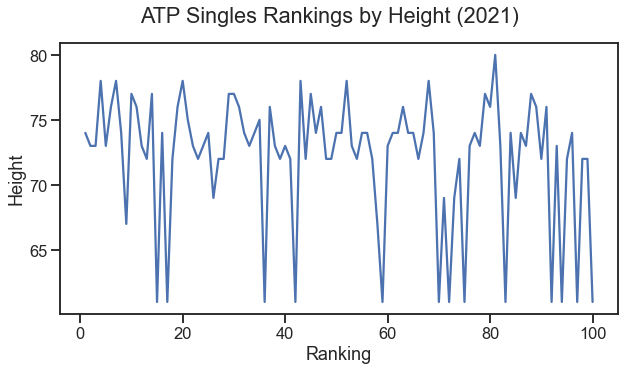

In [96]:
plt.figure(figsize=(10,5))
plt.suptitle("ATP Singles Rankings by Height (2021)")
sns.lineplot(x = 'Ranking', y = 'Height', data = df)

In [97]:
df['Height'].mean()

72.18

In [98]:
df2['Height'].mean()

71.3225806451613

In [100]:
clean_top_200 = pd.concat([df,df2])

In [101]:
clean_top_200.head()

,Last Name,Ranking,Age,Turned Pro,Weight,Height,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won,Aces,Double Faults,1st Serve,1st Serve Points Won,2nd Serve Points Won,Break Points Faced,Break Points Saved,Service Games Played,Service Games Won,Total Service Points Won
0,Djokovic,1,33,2003.0,170,74,34%,55%,"9,509",44%,"13,169",32%,42%,54%,"5,882","2,486",65%,74%,55%,"5,574",65%,"13,544",86%,67%
1,Nadal,2,34,2001.0,187,73,34%,55%,"10,299",45%,"13,824",34%,42%,55%,"3,604","1,878",68%,72%,57%,"5,926",67%,"13,943",86%,67%
2,Thiem,3,27,2011.0,174,73,30%,50%,"3,381",39%,"5,617",24%,38%,51%,"2,622","1,244",60%,74%,53%,"2,578",63%,"5,605",83%,66%
3,Medvedev,4,24,2014.0,182,78,30%,53%,"1,850",40%,"2,964",25%,39%,52%,"1,914",836,60%,74%,52%,"1,408",62%,"2,953",82%,65%
4,Federer,5,39,1998.0,187,73,33%,51%,"11,822",41%,"18,229",27%,40%,54%,"11,344","2,742",62%,77%,57%,"6,367",67%,"18,630",89%,70%
